# Go and Non-go Task

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


def softmax(X):                                                                 ###converts log probabilities to probabilities
  norm = np.sum(np.exp(X)+10**-5)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def softmax_dim2(X):                                                            ###converts matrix of log probabilities to matrix of probabilities
  norm = np.sum(np.exp(X)+10**-5,axis=0)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

<ipython-input-16-1bb5ba3c5b44>:226: RuntimeWarning: divide by zero encountered in log
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs
<ipython-input-16-1bb5ba3c5b44>:246: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u1[t] = np.arange(2)[Pi1[:,t]==np.amax(Pi1[:,t])]
<ipython-input-16-1bb5ba3c5b44>:271: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])] ###generative process is discrete


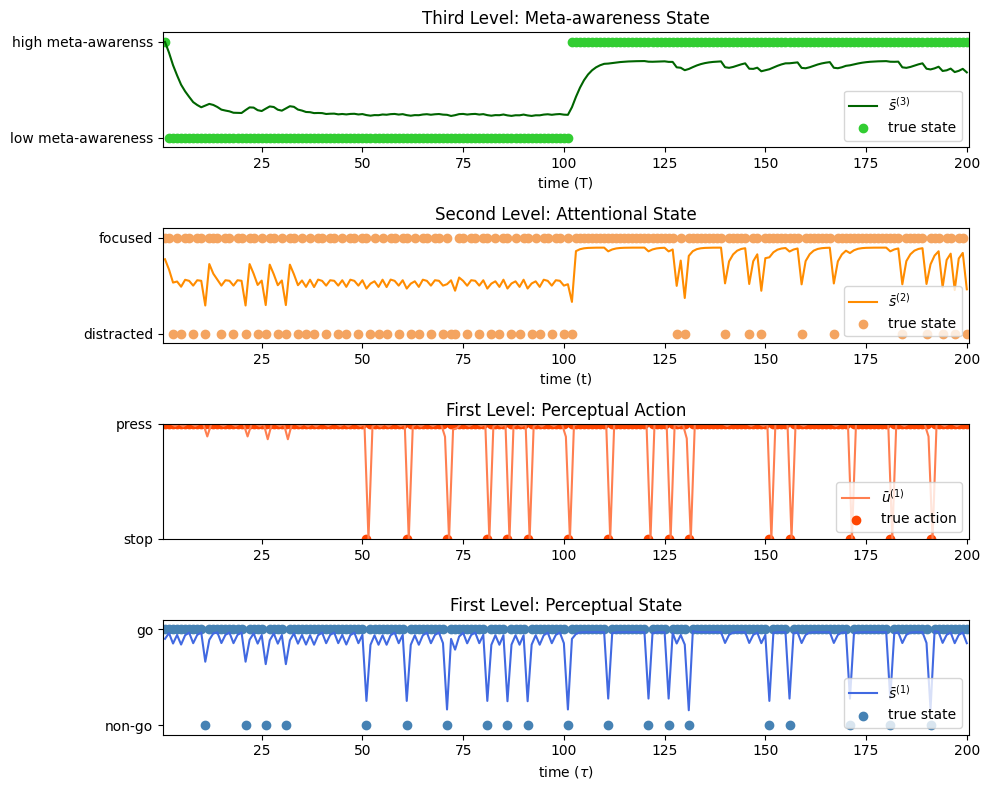

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


def softmax(X):                                                                 ###converts log probabilities to probabilities
  norm = np.sum(np.exp(X)+10**-5)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def softmax_dim2(X):                                                            ###converts matrix of log probabilities to matrix of probabilities
  norm = np.sum(np.exp(X)+10**-5,axis=0)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

#####################################################################
#Three_level Low_metaawareness-> High_metaawarenss
#####################################################################

################################################################################
### Defining parameters
################################################################################

fig7=0                      ### Setting parameters for each figure
fig10=0
fig11=1


T = 200                     ### Number of time-steps

X3 = np.zeros((2,T))        ### meta-awareness states prior (high vs low precision)
X3bar = np.zeros((2,T))     ### meta-awareness states posterior (high vs low precision)
x3 = np.zeros(T)            ### discrete generative process states --> x3 sets gammaA2
x3[0] = 0                   ### start in a high meta-awareness state

Pi2 = np.zeros((2, T))  # 注意力动作的先验（保持，切换）
Pi2bar = np.zeros((2, T))  # 注意力动作的后验（保持，切换）
Pi1 = np.zeros((2, T))  # 感知动作的先验（停止，按下按钮）
Pi1bar = np.zeros((2, T))  # 感知动作的后验（停止，按下按钮）

E2 = np.array([0.99, 0.99])  # 注意力策略的先验概率
E1 = np.array([0.99, 0.99])  # 感知策略的先验概率
gammaG2 = 4.0
gammaG1 = 4.0
C2 = np.array([2, -2])  # 对注意力结果的偏好
C1 = np.array([2, -2])  # 对感知结果的偏好

X3 = np.zeros((2, T))
X3bar = np.zeros((2, T))

X2 = np.zeros((2, T))
X2bar = np.zeros((2, T))

x2 = np.zeros(T)
x2[0] = 0
u2 = np.zeros(T, dtype=int)  # 注意力层的离散生成过程活动状态

X1 = np.zeros((2, T))
X1bar = np.zeros((2, T))

x1 = np.zeros(T)
x1[0] = 0
u1 = np.zeros(T, dtype=int)  # 感知层的离散生成过程活动状态

# 0=go,1=non-go
O = np.zeros(T)
O[10] = 1
O[20] = 1
O[25] = 1
O[30] = 1
O[50] = 1
O[60] = 1
O[70] = 1
O[80] = 1
O[85] = 1
O[90] = 1
O[100] = 1
O[110] = 1
O[120] = 1
O[125] = 1
O[130] = 1
O[150] = 1
O[155] = 1
O[170] = 1
O[180] = 1
O[190] = 1



O1 = np.zeros((2, T))
O1bar = np.zeros((2, T))
for t in range(T):
  O1bar[int(O[t]), t] = 1

X3[:, 0] = [1.0, 0]
X2[:, 0] = [0.5, 0.5]
X1[:, 0] = [0.5, 0.5]

O2bar = np.zeros((2,T))     ### observation posterior on the second level (focused vs distracted)

######## Defining transition matrices  ##########

B3 = np.zeros((2,2))
B3[:,0]=[.9,0.1]            ###probability of high/low meta-awareness, given high meta-awareness
B3[:,1]=[0.1,.9]            ###probability of high/low meta-awareness, given low meta-awareness


B2a = np.zeros((2, 2))
B2b = np.zeros((2, 2))

B2a[:, 0] = [0.8, 0.2]
B2a[:, 1] = [0.0, 1.0]

B2b[:, 0] = [0.0, 1.0]
B2b[:, 1] = [1.0, 0.0]

B2t = np.zeros((2, 2, 2))
B2t[:, :, 0] = B2a
B2t[:, :, 1] = B2b

B1a = np.zeros((2, 2))
B1b = np.zeros((2, 2))

B1a[:, 0] = [0.8, 0.2]
B1a[:, 1] = [0.0, 1.0]

B1b[:, 0] = [0.0, 1.0]
B1b[:, 1] = [1.0, 0.0]

B1t = np.zeros((2, 2, 2))
B1t[:, :, 0] = B1a
B1t[:, :, 1] = B1b


######## Defining likelihood matrices  ##########

A1 = np.zeros((2, 2))
A1[:, 0] = [0.75, 0.25]
A1[:, 1] = [0.25, 0.75]
gammaA1 = np.zeros(T)

betaA1m = np.zeros(2)
betaA1m[:] = [0.5, 2.0]

A2 = np.zeros((2,2))
A2[:,0] = [0.65,0.35]
A2[:,1] = [0.35,0.65]
gammaA2 = np.zeros(T)
betaA2m = np.array([0.5,2.0])


A3 = np.zeros((2,2))
A3[:,0] = [0.9,0.1]
A3[:,1] = [0.1,0.9]

######## Setting up F & G calculations #######

H2 = np.zeros(2)
H2[0] = np.inner(A2, np.log(A2))[0, 0]
H2[1] = np.inner(A2, np.log(A2))[1, 1]

G2 = np.zeros((2, T))
F2 = np.zeros((2, T))

H1 = np.zeros(2)
H1[0] = np.inner(A1, np.log(A1))[0, 0]
H1[1] = np.inner(A1, np.log(A1))[1, 1]

G1 = np.zeros((2, T))
F1 = np.zeros((2, T))


################################################################################
### Running the simulation
################################################################################


### State belief updating
for t in range(T):
  ###meta-awareness level X3:
  betaA2 = np.sum(betaA2m*np.inner(A3,X3[:,t])) ### Bayesian model average (prior precision beliefs)
  gammaA2[t] = betaA2m[int(x3[t])]**-1          ### actual precision is based on generative process (earlier it was betaA2**-1)
  A2bar = softmax_dim2(np.log(A2)*gammaA2[t])
  O2bar[int(x2[t]),t]=1 ###set the true lower-level attentional states as observations to inform the meta-awareness charge

  ###attentional level X2:
  betaA1 = np.sum(betaA1m*np.inner(A2bar,X2[:,t]))  ### Bayesian model average (prior precision beliefs)
  gammaA1[t] = betaA1m[int(x2[t])]**-1              ### actual precision is based on generative process (earlier it was betaA1**-1)
  A1bar = softmax_dim2(np.log(A1)*gammaA1[t])              ### Precision weighted likelihood mapping

  ###perceptual level X1:
  O1[:,t] = np.inner(A1bar,X1[:,t])                                        ### Observation priors
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O[t]),:])) ## calculate perceptual state posterior


  ###calculating ascending message from X1->X2
  AtC = 0                                       ### "attentional charge" - inverse precision updating term
  for i in range(2):                            ##loop over outcomes
    for j in range(2):                          ##loop over states
      AtC += (O1bar[i,t]-A1bar[i,j])*X1bar[j,t]*np.log(A1[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if AtC > betaA1m[0]:
    AtC = betaA1m[0]-10**-5
  betaA1bar = betaA1 - AtC                      ## inverse precision posterior
  X2bar[:,t] = softmax(np.log(X2[:,t])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))  ## calculate attentional state posterior given precision beliefs


  X2bar[:,t] = softmax(np.log(X2[:,t])+gammaA2[t]*np.log(A2[int(x2[t]),:])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))


  ###calculating ascending message from X2->X3
  MaC = 0                                       ### "meta-awareness charge" - inverse precision updating term
  for i in range(2):                            ##loop over outcomes
    for j in range(2):                          ##loop over states
      MaC += (O2bar[i,t]-A2bar[i,j])*X2bar[j,t]*np.log(A2[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if MaC > betaA2m[0]:
    MaC = betaA2m[0]-10**-5
  betaA2bar = betaA2 - MaC                      ## inverse precision posterior
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs



### Policy selection

  if t<(T-1):

    X1a = np.inner(B1a,X1bar[:,t])
    O1a = np.inner(A1bar,X1a)

    X1b = np.inner(B1b,X1bar[:,t])
    O1b = np.inner(A1bar,X1b)

    G1[0,t] = np.sum(O1a*(np.log(O1a)-C2)-X1a*H1)
    G1[1,t] = np.sum(O1b*(np.log(O1b)-C2)-X1b*H1)

    Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])

    B1 = B1a*Pi1[0,t]+B1b*Pi1[1,t]
    u1[t] = np.arange(2)[Pi1[:,t]==np.amax(Pi1[:,t])]


    X2a = np.inner(B2a,X2bar[:,t])
    O2a = np.inner(A2,X2a)

    X2b = np.inner(B2b,X2bar[:,t])
    O2b = np.inner(A2,X2b)

    #print("t:",t, "X2a:",X2a, "X2b:", X2b, "X2bar:",X2bar[:,t])

    G2[0,t] = np.sum(O2a*(np.log(O2a)-C2)-X2a*H2)
    G2[1,t] = np.sum(O2b*(np.log(O2b)-C2)-X2b*H2)
    #print("O2a:",O2a,"O2b:",O2b)
    Pi2[:,t] = softmax(np.log(E2)-gammaG2*G2[:,t])
    #print("Pi2:",Pi2[:,t],"G2:",G2[:,t])
    Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])


    B2 = B2a*Pi2[0,t]+B2b*Pi2[1,t]

    X3[:,t+1] = np.inner(B3,X3bar[:,t])
    X2[:,t+1] = np.inner(B2,X2bar[:,t]) ###evolve expected state
    X1[:,t+1] = np.inner(B1,X1bar[:,t])

    u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])] ###generative process is discrete

     ### generative process driving attentional states
    if fig7:
      if t<T/2:
        x2[t+1] = 0 ##set to focused
      else:
        x2[t+1] = 1 ##set to distracted
    else:
      if u2[t]==0:
        x2[t+1] = np.random.choice([0,1],p=B2a[:,int(x2[t])]) ###generate true state from action 0
      else:
        x2[t+1] = np.random.choice([0,1],p=B2b[:,int(x2[t])]) ###generate true state from action 1

    if fig11:
      if t<T/2:
        x3[t+1]=1
      else:
        x3[t+1]=0
    else:
      x3[t+1] = np.random.choice([0,1],p=B3[:,int(x3[t])]) ###generate true state



  X2abar = softmax(np.log(X2a)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))
  X2bbar = softmax(np.log(X2b)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))

  X1abar=softmax(np.log(X1a)+gammaA1[t]*np.log(A1[int(O[t]),:]))
  X1bbar=softmax(np.log(X1b)+gammaA1[t]*np.log(A1[int(O[t]),:]))


  if t>0:
    F2[0,t-1] = np.sum(X2abar*(np.log(X2abar)-np.log(A2[int(x2[t]),:])-np.log(X2a)))
    F2[1,t-1] = np.sum(X2bbar*(np.log(X2bbar)-np.log(A2[int(x2[t]),:])-np.log(X2b)))
    F1[0,t-1] = np.sum(X1abar*(np.log(X1abar)-np.log(A1bar[int(x1[t]),:])-np.log(X1a)))
    F1[1,t-1] = np.sum(X1bbar*(np.log(X1bbar)-np.log(A1bar[int(x1[t]),:])-np.log(X1b)))

    #print("F2:",F2[:,t-1])
    Pi2bar[:,t-1]=softmax(np.log(E2)-gammaG2*G2[:,t-1]-F2[:,t-1])
    Pi1bar[:,t-1]=softmax(np.log(E1)-gammaG1*G1[:,t-1]-F1[:,t-1])


################################################################################
### Plotting results
################################################################################


plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X3bar[0,:],label=r'${\bar{s}}^{(3)}$',color='darkgreen')
plt.scatter(1+np.arange(T),1-x3,label='true state',color='limegreen')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['low meta-awareness','high meta-awarenss'])
plt.xlabel('time (T)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Third Level: Meta-awareness State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

#plt.subplot(4,1,2)
#plt.plot(1.5+np.arange(0,T-1),Pi2[0,:-1],label='stay (prior)',linestyle='--')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (prior')
#plt.plot(1.5+np.arange(0,T-1),Pi2bar[0,:-1],label=r'${\bar{\pi}}^{(2)}$',color='coral')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (posterior)',linestyle='--')
#plt.scatter(1+np.arange(T),1-u2,label='true action',color='orangered')
#plt.legend(loc = 'lower right')
#plt.ylim([0,1.0])
#plt.yticks([0,1],['switch','stay'])
#plt.ylabel(r'$\pi^{(2)}$')
#plt.title('Second Level: Attentional Action')
#plt.xlim([0.5,T+0.5])
#plt.xlabel('time (t)')

plt.subplot(4,1,2)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X2bar[0,:],label=r'${\bar{s}}^{(2)}$',color='darkorange')
plt.scatter(1+np.arange(T),1-x2,label='true state',color='sandybrown')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['distracted','focused'])
plt.xlabel('time (t)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Second Level: Attentional State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

plt.subplot(4, 1, 3)
plt.plot(1.5 + np.arange(0, T - 1), Pi1bar[0, :-1], label=r'${\bar{u}}^{(1)}$', color='coral')
plt.scatter(1 + np.arange(T), 1 - u1, label='true action', color='orangered')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.yticks([0, 1], ['stop','press'])
plt.title('First Level: Perceptual Action')
plt.legend(loc = 'lower right')
plt.xlim([0.5, T + 0.5])

plt.subplot(4,1,4)
#plt.plot(1+np.arange(T),X1[0,:],label=r'$x^{(1)}$',linestyle='--')
plt.plot(1+np.arange(T),X1bar[0,:],label=r'${\bar{s}}^{(1)}$',color='royalblue')
plt.yticks([0,1],['non-go','go'])
plt.xlabel(r'time ($\tau$)')
plt.scatter(1+np.arange(T),1-O,label='true state',color='steelblue')
plt.title('First Level: Perceptual State')
plt.legend(loc = 'lower right')
plt.ylim([-0.1,1.1])
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])


plt.tight_layout()
#plt.savefig("figure_11.tiff", dpi = 600)
# files.download("figure_11.tiff")

<ipython-input-17-991fa7643707>:226: RuntimeWarning: divide by zero encountered in log
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs
<ipython-input-17-991fa7643707>:246: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u1[t] = np.arange(2)[Pi1[:,t]==np.amax(Pi1[:,t])]
<ipython-input-17-991fa7643707>:271: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])] ###generative process is discrete


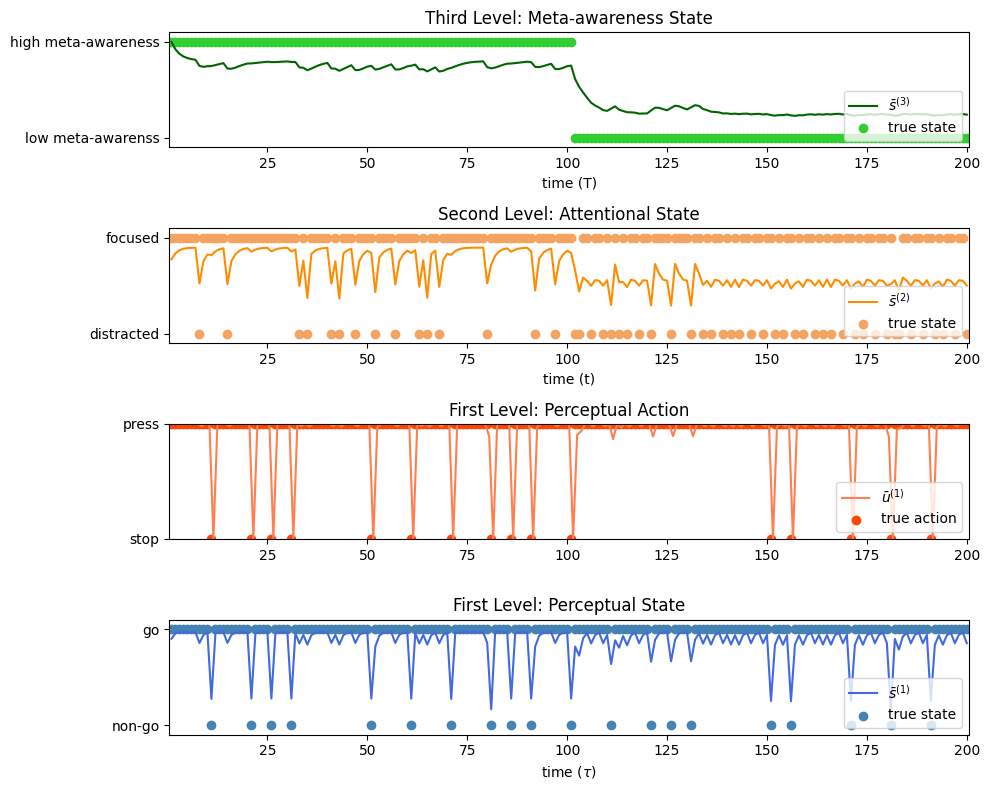

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


def softmax(X):                                                                 ###converts log probabilities to probabilities
  norm = np.sum(np.exp(X)+10**-5)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def softmax_dim2(X):                                                            ###converts matrix of log probabilities to matrix of probabilities
  norm = np.sum(np.exp(X)+10**-5,axis=0)
  Y = (np.exp(X)+10**-5)/norm
  return Y

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

def normalise(X):                                                               ###normalises a matrix of probabilities
  X= X/np.sum(X,0)
  return X

#####################################################################
#Three_level Low_metaawareness-> High_metaawarenss
#####################################################################

################################################################################
### Defining parameters
################################################################################

fig7=0                      ### Setting parameters for each figure
fig10=0
fig11=1


T = 200                     ### Number of time-steps

X3 = np.zeros((2,T))        ### meta-awareness states prior (high vs low precision)
X3bar = np.zeros((2,T))     ### meta-awareness states posterior (high vs low precision)
x3 = np.zeros(T)            ### discrete generative process states --> x3 sets gammaA2
x3[0] = 0                   ### start in a high meta-awareness state

Pi2 = np.zeros((2, T))  # 注意力动作的先验（保持，切换）
Pi2bar = np.zeros((2, T))  # 注意力动作的后验（保持，切换）
Pi1 = np.zeros((2, T))  # 感知动作的先验（停止，按下按钮）
Pi1bar = np.zeros((2, T))  # 感知动作的后验（停止，按下按钮）

E2 = np.array([0.99, 0.99])  # 注意力策略的先验概率
E1 = np.array([0.99, 0.99])  # 感知策略的先验概率
gammaG2 = 4.0
gammaG1 = 4.0
C2 = np.array([2, -2])  # 对注意力结果的偏好
C1 = np.array([2, -2])  # 对感知结果的偏好

X3 = np.zeros((2, T))
X3bar = np.zeros((2, T))

X2 = np.zeros((2, T))
X2bar = np.zeros((2, T))

x2 = np.zeros(T)
x2[0] = 0
u2 = np.zeros(T, dtype=int)  # 注意力层的离散生成过程活动状态

X1 = np.zeros((2, T))
X1bar = np.zeros((2, T))

x1 = np.zeros(T)
x1[0] = 0
u1 = np.zeros(T, dtype=int)  # 感知层的离散生成过程活动状态

# 0=go,1=non-go
O = np.zeros(T)
O[10] = 1
O[20] = 1
O[25] = 1
O[30] = 1
O[50] = 1
O[60] = 1
O[70] = 1
O[80] = 1
O[85] = 1
O[90] = 1
O[100] = 1
O[110] = 1
O[120] = 1
O[125] = 1
O[130] = 1
O[150] = 1
O[155] = 1
O[170] = 1
O[180] = 1
O[190] = 1



O1 = np.zeros((2, T))
O1bar = np.zeros((2, T))
for t in range(T):
  O1bar[int(O[t]), t] = 1

X3[:, 0] = [1.0, 0]
X2[:, 0] = [0.5, 0.5]
X1[:, 0] = [0.5, 0.5]

O2bar = np.zeros((2,T))     ### observation posterior on the second level (focused vs distracted)

######## Defining transition matrices  ##########

B3 = np.zeros((2,2))
B3[:,0]=[.9,0.1]            ###probability of high/low meta-awareness, given high meta-awareness
B3[:,1]=[0.1,.9]            ###probability of high/low meta-awareness, given low meta-awareness


B2a = np.zeros((2, 2))
B2b = np.zeros((2, 2))

B2a[:, 0] = [0.8, 0.2]
B2a[:, 1] = [0.0, 1.0]

B2b[:, 0] = [0.0, 1.0]
B2b[:, 1] = [1.0, 0.0]

B2t = np.zeros((2, 2, 2))
B2t[:, :, 0] = B2a
B2t[:, :, 1] = B2b

B1a = np.zeros((2, 2))
B1b = np.zeros((2, 2))

B1a[:, 0] = [0.8, 0.2]
B1a[:, 1] = [0.0, 1.0]

B1b[:, 0] = [0.0, 1.0]
B1b[:, 1] = [1.0, 0.0]

B1t = np.zeros((2, 2, 2))
B1t[:, :, 0] = B1a
B1t[:, :, 1] = B1b


######## Defining likelihood matrices  ##########

A1 = np.zeros((2, 2))
A1[:, 0] = [0.75, 0.25]
A1[:, 1] = [0.25, 0.75]
gammaA1 = np.zeros(T)

betaA1m = np.zeros(2)
betaA1m[:] = [0.5, 2.0]

A2 = np.zeros((2,2))
A2[:,0] = [0.65,0.35]
A2[:,1] = [0.35,0.65]
gammaA2 = np.zeros(T)
betaA2m = np.array([0.5,2.0])


A3 = np.zeros((2,2))
A3[:,0] = [0.9,0.1]
A3[:,1] = [0.1,0.9]

######## Setting up F & G calculations #######

H2 = np.zeros(2)
H2[0] = np.inner(A2, np.log(A2))[0, 0]
H2[1] = np.inner(A2, np.log(A2))[1, 1]

G2 = np.zeros((2, T))
F2 = np.zeros((2, T))

H1 = np.zeros(2)
H1[0] = np.inner(A1, np.log(A1))[0, 0]
H1[1] = np.inner(A1, np.log(A1))[1, 1]

G1 = np.zeros((2, T))
F1 = np.zeros((2, T))


################################################################################
### Running the simulation
################################################################################


### State belief updating
for t in range(T):
  ###meta-awareness level X3:
  betaA2 = np.sum(betaA2m*np.inner(A3,X3[:,t])) ### Bayesian model average (prior precision beliefs)
  gammaA2[t] = betaA2m[int(x3[t])]**-1          ### actual precision is based on generative process (earlier it was betaA2**-1)
  A2bar = softmax_dim2(np.log(A2)*gammaA2[t])
  O2bar[int(x2[t]),t]=1 ###set the true lower-level attentional states as observations to inform the meta-awareness charge

  ###attentional level X2:
  betaA1 = np.sum(betaA1m*np.inner(A2bar,X2[:,t]))  ### Bayesian model average (prior precision beliefs)
  gammaA1[t] = betaA1m[int(x2[t])]**-1              ### actual precision is based on generative process (earlier it was betaA1**-1)
  A1bar = softmax_dim2(np.log(A1)*gammaA1[t])              ### Precision weighted likelihood mapping

  ###perceptual level X1:
  O1[:,t] = np.inner(A1bar,X1[:,t])                                        ### Observation priors
  X1bar[:,t] = softmax(np.log(X1[:,t])+gammaA1[t]*np.log(A1[int(O[t]),:])) ## calculate perceptual state posterior


  ###calculating ascending message from X1->X2
  AtC = 0                                       ### "attentional charge" - inverse precision updating term
  for i in range(2):                            ##loop over outcomes
    for j in range(2):                          ##loop over states
      AtC += (O1bar[i,t]-A1bar[i,j])*X1bar[j,t]*np.log(A1[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if AtC > betaA1m[0]:
    AtC = betaA1m[0]-10**-5
  betaA1bar = betaA1 - AtC                      ## inverse precision posterior
  X2bar[:,t] = softmax(np.log(X2[:,t])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))  ## calculate attentional state posterior given precision beliefs


  X2bar[:,t] = softmax(np.log(X2[:,t])+gammaA2[t]*np.log(A2[int(x2[t]),:])-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))


  ###calculating ascending message from X2->X3
  MaC = 0                                       ### "meta-awareness charge" - inverse precision updating term
  for i in range(2):                            ##loop over outcomes
    for j in range(2):                          ##loop over states
      MaC += (O2bar[i,t]-A2bar[i,j])*X2bar[j,t]*np.log(A2[i,j])   ### See "Uncertainty, epistemics and active inference" Parr, Friston.
  if MaC > betaA2m[0]:
    MaC = betaA2m[0]-10**-5
  betaA2bar = betaA2 - MaC                      ## inverse precision posterior
  X3bar[:,t] = softmax(np.log(X3[:,t])+0.1*np.log(A3[int(x3[t]),:])-1.0*np.log((betaA2m-MaC)/betaA2m*betaA2/betaA2bar))  ## calculate meta-awareness state posterior given precision beliefs



### Policy selection

  if t<(T-1):

    X1a = np.inner(B1a,X1bar[:,t])
    O1a = np.inner(A1bar,X1a)

    X1b = np.inner(B1b,X1bar[:,t])
    O1b = np.inner(A1bar,X1b)

    G1[0,t] = np.sum(O1a*(np.log(O1a)-C2)-X1a*H1)
    G1[1,t] = np.sum(O1b*(np.log(O1b)-C2)-X1b*H1)

    Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])

    B1 = B1a*Pi1[0,t]+B1b*Pi1[1,t]
    u1[t] = np.arange(2)[Pi1[:,t]==np.amax(Pi1[:,t])]


    X2a = np.inner(B2a,X2bar[:,t])
    O2a = np.inner(A2,X2a)

    X2b = np.inner(B2b,X2bar[:,t])
    O2b = np.inner(A2,X2b)

    #print("t:",t, "X2a:",X2a, "X2b:", X2b, "X2bar:",X2bar[:,t])

    G2[0,t] = np.sum(O2a*(np.log(O2a)-C2)-X2a*H2)
    G2[1,t] = np.sum(O2b*(np.log(O2b)-C2)-X2b*H2)
    #print("O2a:",O2a,"O2b:",O2b)
    Pi2[:,t] = softmax(np.log(E2)-gammaG2*G2[:,t])
    #print("Pi2:",Pi2[:,t],"G2:",G2[:,t])
    Pi1[:,t] = softmax(np.log(E1)-gammaG1*G1[:,t])


    B2 = B2a*Pi2[0,t]+B2b*Pi2[1,t]

    X3[:,t+1] = np.inner(B3,X3bar[:,t])
    X2[:,t+1] = np.inner(B2,X2bar[:,t]) ###evolve expected state
    X1[:,t+1] = np.inner(B1,X1bar[:,t])

    u2[t] = np.arange(2)[Pi2[:,t]==np.amax(Pi2[:,t])] ###generative process is discrete

     ### generative process driving attentional states
    if fig7:
      if t<T/2:
        x2[t+1] = 0 ##set to focused
      else:
        x2[t+1] = 1 ##set to distracted
    else:
      if u2[t]==0:
        x2[t+1] = np.random.choice([0,1],p=B2a[:,int(x2[t])]) ###generate true state from action 0
      else:
        x2[t+1] = np.random.choice([0,1],p=B2b[:,int(x2[t])]) ###generate true state from action 1

    if fig11:
      if t<T/2:
        x3[t+1]=0
      else:
        x3[t+1]=1
    else:
      x3[t+1] = np.random.choice([0,1],p=B3[:,int(x3[t])]) ###generate true state



  X2abar = softmax(np.log(X2a)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))
  X2bbar = softmax(np.log(X2b)-1.0*np.log((betaA1m-AtC)/betaA1m*betaA1/betaA1bar))

  X1abar=softmax(np.log(X1a)+gammaA1[t]*np.log(A1[int(O[t]),:]))
  X1bbar=softmax(np.log(X1b)+gammaA1[t]*np.log(A1[int(O[t]),:]))


  if t>0:
    F2[0,t-1] = np.sum(X2abar*(np.log(X2abar)-np.log(A2[int(x2[t]),:])-np.log(X2a)))
    F2[1,t-1] = np.sum(X2bbar*(np.log(X2bbar)-np.log(A2[int(x2[t]),:])-np.log(X2b)))
    F1[0,t-1] = np.sum(X1abar*(np.log(X1abar)-np.log(A1bar[int(x1[t]),:])-np.log(X1a)))
    F1[1,t-1] = np.sum(X1bbar*(np.log(X1bbar)-np.log(A1bar[int(x1[t]),:])-np.log(X1b)))

    #print("F2:",F2[:,t-1])
    Pi2bar[:,t-1]=softmax(np.log(E2)-gammaG2*G2[:,t-1]-F2[:,t-1])
    Pi1bar[:,t-1]=softmax(np.log(E1)-gammaG1*G1[:,t-1]-F1[:,t-1])


################################################################################
### Plotting results
################################################################################


plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X3bar[0,:],label=r'${\bar{s}}^{(3)}$',color='darkgreen')
plt.scatter(1+np.arange(T),1-x3,label='true state',color='limegreen')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['low meta-awarenss','high meta-awareness'])
plt.xlabel('time (T)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Third Level: Meta-awareness State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

#plt.subplot(4,1,2)
#plt.plot(1.5+np.arange(0,T-1),Pi2[0,:-1],label='stay (prior)',linestyle='--')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (prior')
#plt.plot(1.5+np.arange(0,T-1),Pi2bar[0,:-1],label=r'${\bar{\pi}}^{(2)}$',color='coral')
#plt.plot(np.arange(1,T),Pi2[1,:-1],label='switch (posterior)',linestyle='--')
#plt.scatter(1+np.arange(T),1-u2,label='true action',color='orangered')
#plt.legend(loc = 'lower right')
#plt.ylim([0,1.0])
#plt.yticks([0,1],['switch','stay'])
#plt.ylabel(r'$\pi^{(2)}$')
#plt.title('Second Level: Attentional Action')
#plt.xlim([0.5,T+0.5])
#plt.xlabel('time (t)')

plt.subplot(4,1,2)
#plt.plot(1+np.arange(T),X2[0,:],label=r'${x}^{(2)}$',linestyle='--')
plt.plot(1+np.arange(T),X2bar[0,:],label=r'${\bar{s}}^{(2)}$',color='darkorange')
plt.scatter(1+np.arange(T),1-x2,label='true state',color='sandybrown')
#plt.imshow([0.5*(1-0.5*x2),0.5*(1-0.5*x2)], aspect='auto',cmap='gray',alpha=0.3,extent=[0.5,100.5,-0.3,1.3])
#plt.plot(X2bar[1,:],label='distracted')
plt.ylim([-0.1,1.1])
plt.yticks([0,1],['distracted','focused'])
plt.xlabel('time (t)')
#plt.ylabel(r'$x^{(2)}$')
plt.title('Second Level: Attentional State')
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])

plt.subplot(4, 1, 3)
plt.plot(1.5 + np.arange(0, T - 1), Pi1bar[0, :-1], label=r'${\bar{u}}^{(1)}$', color='coral')
plt.scatter(1 + np.arange(T), 1 - u1, label='true action', color='orangered')
plt.legend(loc='lower right')
plt.ylim([0, 1.0])
plt.yticks([0, 1], [ 'stop','press'])
plt.title('First Level: Perceptual Action')
plt.legend(loc = 'lower right')
plt.xlim([0.5, T + 0.5])

plt.subplot(4,1,4)
#plt.plot(1+np.arange(T),X1[0,:],label=r'$x^{(1)}$',linestyle='--')
plt.plot(1+np.arange(T),X1bar[0,:],label=r'${\bar{s}}^{(1)}$',color='royalblue')
plt.yticks([0,1],['non-go','go'])
plt.xlabel(r'time ($\tau$)')
plt.scatter(1+np.arange(T),1-O,label='true state',color='steelblue')
plt.title('First Level: Perceptual State')
plt.legend(loc = 'lower right')
plt.ylim([-0.1,1.1])
plt.legend(loc = 'lower right')
plt.xlim([0.5,T+0.5])


plt.tight_layout()
#plt.savefig("figure_11.tiff", dpi = 600)
# files.download("figure_11.tiff")